In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
sys.path.append(work_path)

from my_helper.regression import *
from my_helper.util import *
from my_helper.plot import *

from statsmodels.stats.stattools import durbin_watson
from scipy.stats import zscore, probplot

- ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÄ ÌöåÍ∑ÄÏãùÏùÑ ÎßåÎìúÎäî Í≤ÉÏù¥ ÏïÑÎãå ÏòÅÌñ•ÏùÑ Ï£ºÎ°ú Ï£ºÎäî ÏöîÏÜåÎ•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïú Í≤É
- Î™ÖÎ™©Ìòï Î≥ÄÏàò <-> Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Ï†ÅÌï©Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏàòÌñâÌïòÎ©¥ ÏùòÎØ∏ÏûàÎäî Î≥ÄÏàòÎ•º ÎßåÎì§ÏàòÎèÑ ÏûàÏùå

- Ïù¥ÏÉÅÏπò Ï†úÍ±∞
  - ÏûîÏ∞®Î∂ÑÏÑùÏùÄ Ï†ïÍ∑úÏÑ±ÏùÑ ÎßåÏ°±Ìï¥Ïïº Ï†ïÏÉÅÏ†ÅÏù∏ Î∂ÑÏÑùÍ≤∞Í≥ºÍ∞Ä ÎèÑÏ∂úÎê®
  - Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÏßÄ ÏïäÏúºÎ©¥ Ïò¨Î∞îÎ•∏ ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥ºÍ∞Ä ÎÇòÏò§Í∏∞ Ïñ¥Î†§ÏõÄ

- ÏûîÏ∞®Î∂ÑÏÑù
  - ÏûîÏ∞®(residual) : Ïã§Ï†ú Í¥ÄÏ∏°Í∞íÍ≥º ÏòàÏ∏°Í∞íÏùò Ï∞®Ïù¥
    - ÏûîÏ∞® = Í¥ÄÏ∏°Í∞í - ÏòàÏ∏°Í∞í
  - ÏûîÏ∞®Î∂ÑÏÑù : ÌöåÍ∑ÄÎ∂ÑÏÑù ÏàòÌñâ ÌõÑ ÌöåÍ∑ÄÎ∂ÑÏÑùÏù¥ Ï†ÅÏ†àÌïòÍ≤å ÏàòÌñâÎêòÏóàÎäîÏßÄ, Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©ÌïúÏßÄ ÌèâÍ∞ÄÌïòÎäîÎç∞ ÏÇ¨Ïö©

- ÏûîÏ∞®Î∂ÑÏÑùÏùò ÏöîÍ±¥
  - ÏÑ†ÌòïÏÑ± : Ï†ïÍ∑úÎ∂ÑÌè¨ ÌôïÏù∏ / ÏûîÏ∞® Í∑∏ÎûòÌîÑ ÏãúÍ∞ÅÌôî
  - Ï†ïÍ∑úÏÑ± : normaltest, shapiro, kstest / QQplot, ÏûîÏ∞®ÎèÑ ÏãúÍ∞ÅÌôî
  - Îì±Î∂ÑÏÇ∞ÏÑ± : Breusch-Pagan, Brown-Forsythe Í≤ÄÏ†ï
  - ÎèÖÎ¶ΩÏÑ± : ÎçîÎπà-ÏôìÏä® ÌÜµÍ≥ÑÎüâ

In [2]:
df = my_read_excel("./data/boston.xlsx", info = False)
my_pretty_table(df.head())

+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 6.0622 | 

In [3]:
ignore = ['TAX', 'INDUS', 'AGE', 'CHAS', 'CRIM', 'RAD', 'ZN', 'B']
df = df.drop(ignore, axis=1)
my_pretty_table(df.head())

+----+-------+-------+--------+-----------+---------+--------+
|    |   NOX |    RM |    DIS |   PTRATIO |   LSTAT |   MEDV |
|----+-------+-------+--------+-----------+---------+--------|
|  0 | 0.538 | 6.575 |   4.09 |      15.3 |    4.98 |     24 |
|  1 | 0.469 | 6.421 | 4.9671 |      17.8 |    9.14 |   21.6 |
|  2 | 0.469 | 7.185 | 4.9671 |      17.8 |    4.03 |   34.7 |
|  3 | 0.458 | 6.998 | 6.0622 |      18.7 |    2.94 |   33.4 |
|  4 | 0.458 | 7.147 | 6.0622 |      18.7 |    5.33 |   36.2 |
+----+-------+-------+--------+-----------+---------+--------+


In [4]:
x_train, x_test, y_train, y_test = my_train_test_split(df, yname="MEDV", scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 5), (152, 5), (354,), (152,))

MEDV = -1.661 * NOX + 3.516 * RM + -2.192 * DIS + -2.192 * PTRATIO + -3.987 * LSTAT + 22.762
+------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|            |   Í≤∞Ï†ïÍ≥ÑÏàò(R2) |   ÌèâÍ∑†Ï†àÎåÄÏò§Ï∞®(MAE) |   ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®(MSE) |   ÌèâÍ∑†Ïò§Ï∞®(RMSE) |   ÌèâÍ∑† Ï†àÎåÄ Î∞±Î∂ÑÏò§Ï∞® ÎπÑÏú®(MAPE) |   ÌèâÍ∑† ÎπÑÏú® Ïò§Ï∞®(MPE) |
|------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| ÌõàÎ†®Îç∞Ïù¥ÌÑ∞ |       0.745825 |             3.27197 |             21.8049 |          4.66958 |                         16.9054 |              -3.61383 |
| Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ |       0.603232 |             3.97022 |               32.07 |          5.66304 |                         21.3872 |              -5.53031 |
+------------+----------------+---------------------+---------------------+------------------+--

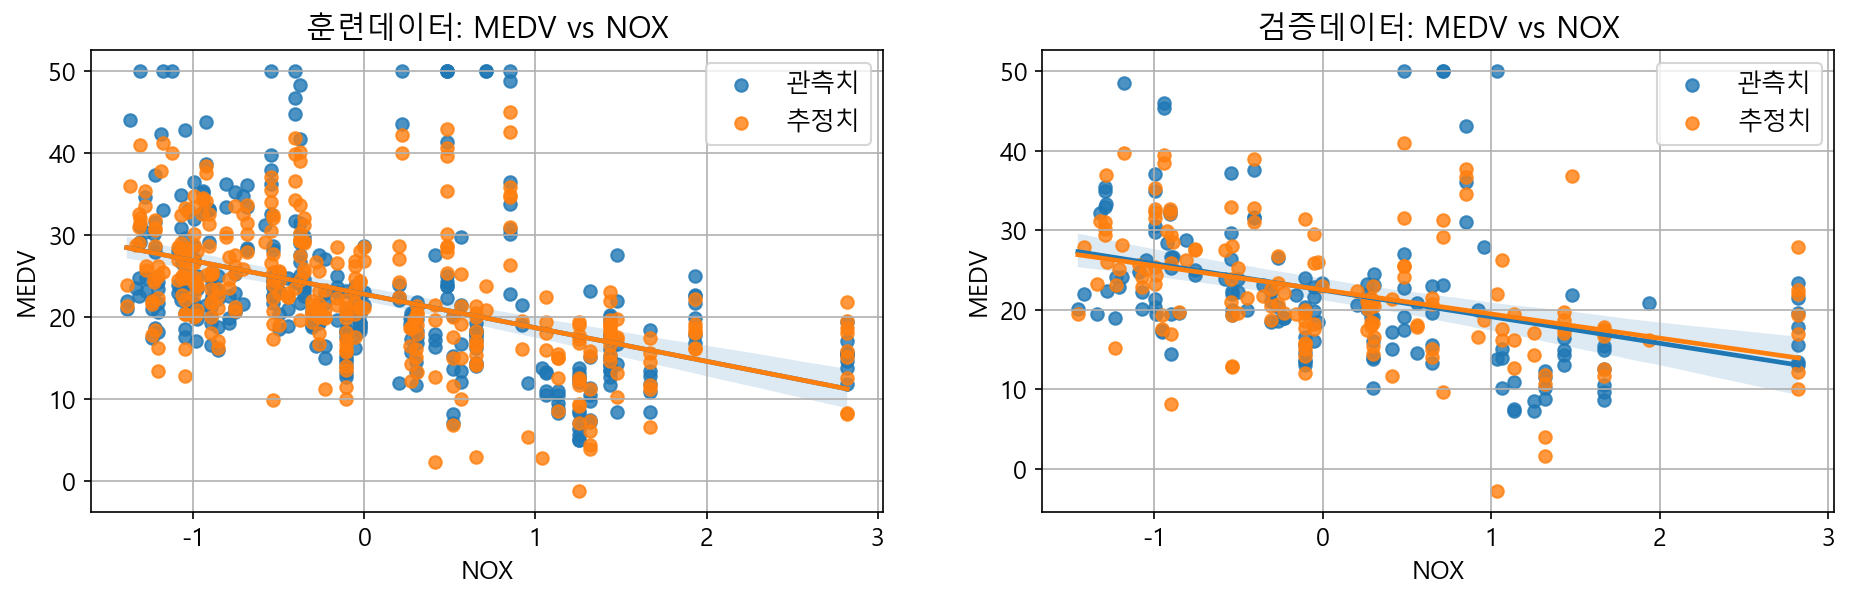

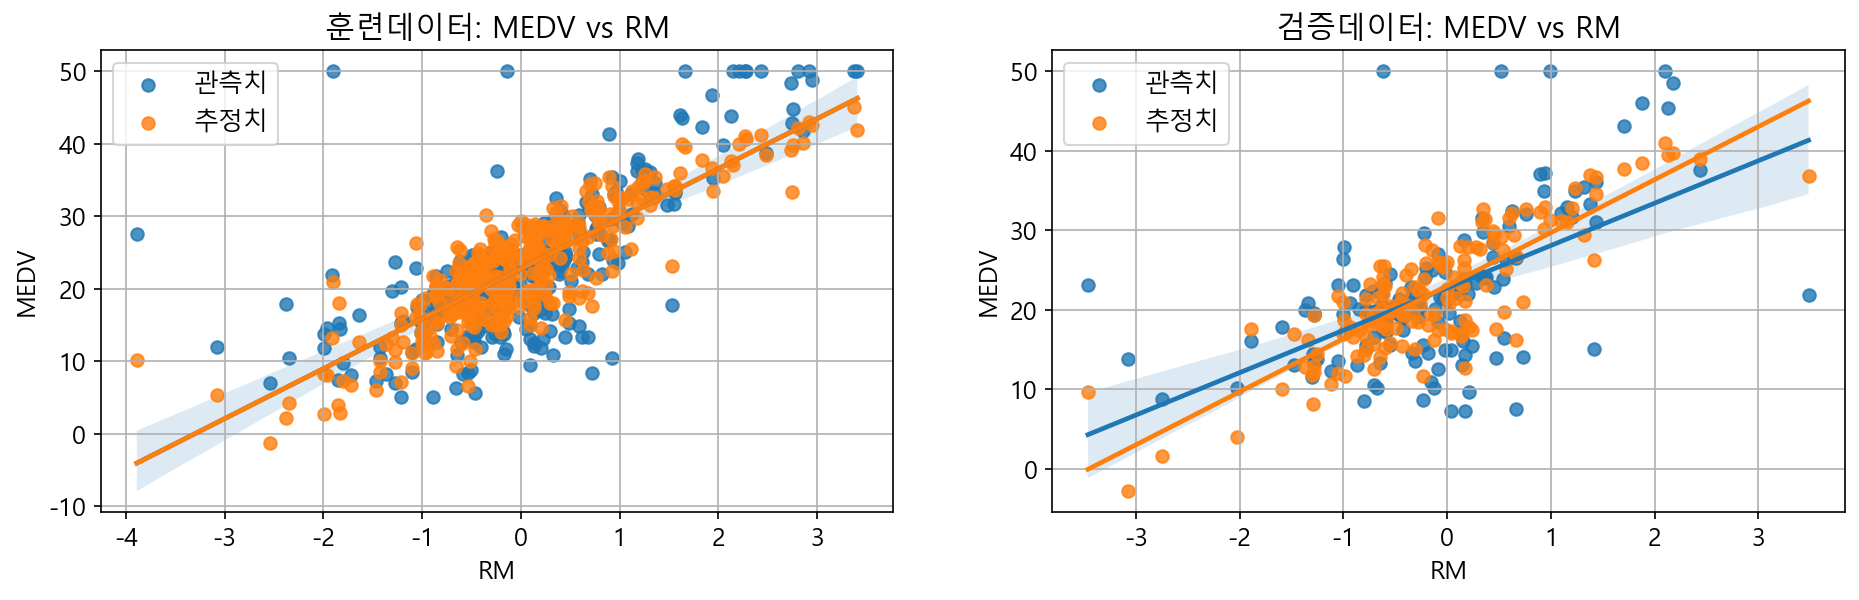

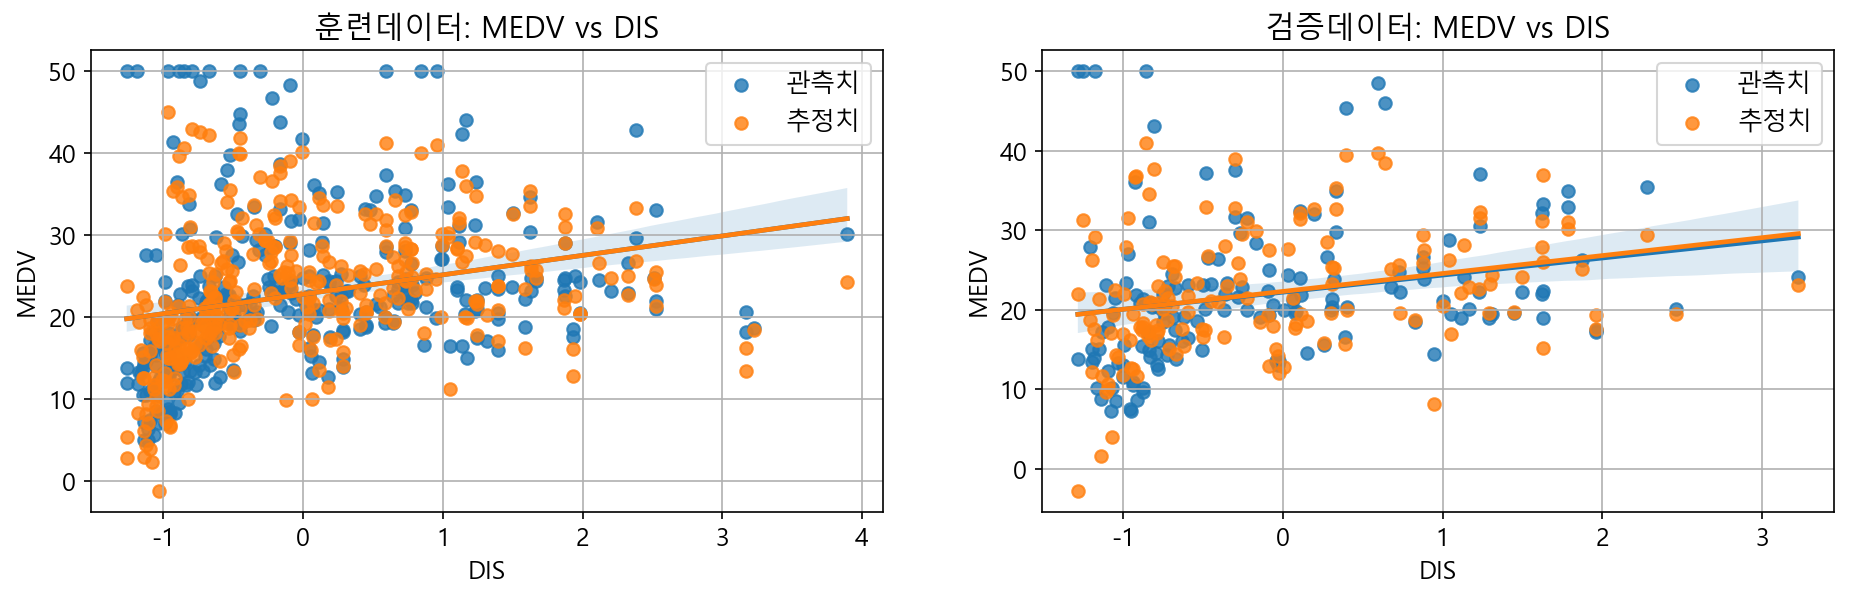

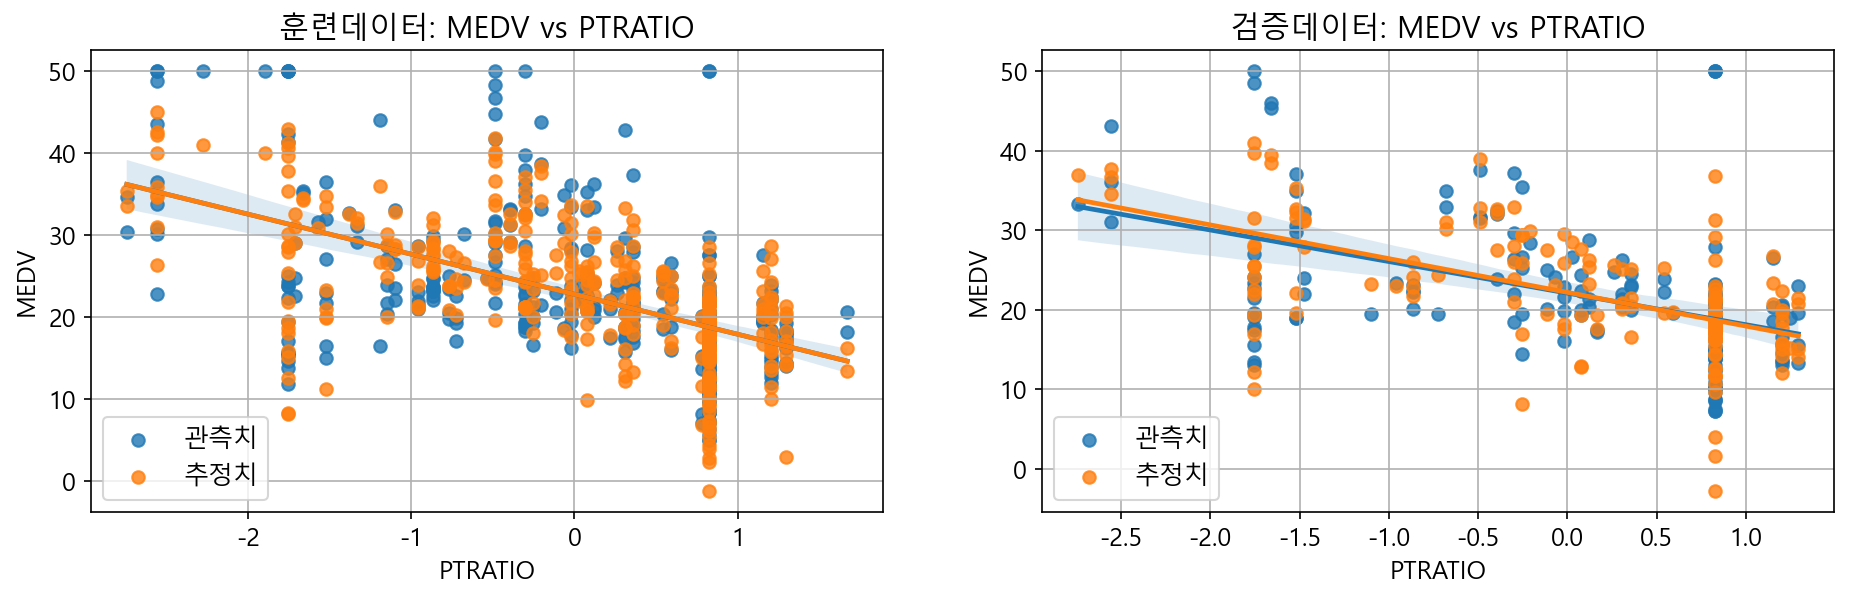

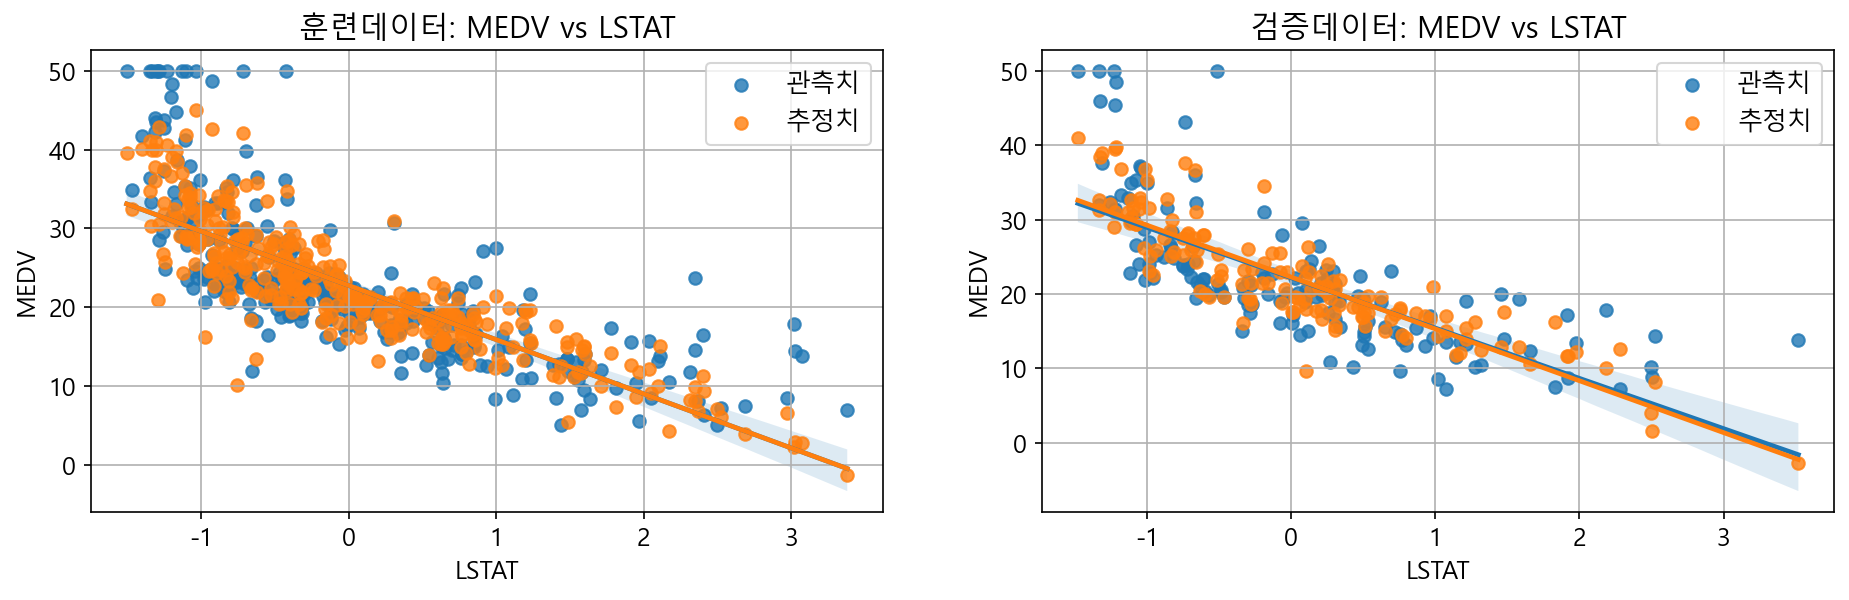

In [5]:
fit = my_linear_regression(x_train, y_train, x_test, y_test, use_plot=True, report=True)

In [6]:
# ÏòàÏ∏°Ïπò
y_pred = fit.predict(x_test)

# ÏûîÏ∞®# ÏòàÏ∏°Ïπò
y_pred = fit.predict(x_test)

# ÏûîÏ∞®
resid = y_test - y_pred

resid_df = pd.DataFrame({"resid": resid}).reset_index(drop=True)
resid_df

resid
0   -6.389163
1   -1.895478
2    5.933878
3    2.961458
4    4.704038
..        ...
147 -1.480395
148 -5.978637
149  0.245207
150 -8.088950
151  2.064045

[152 rows x 1 columns]

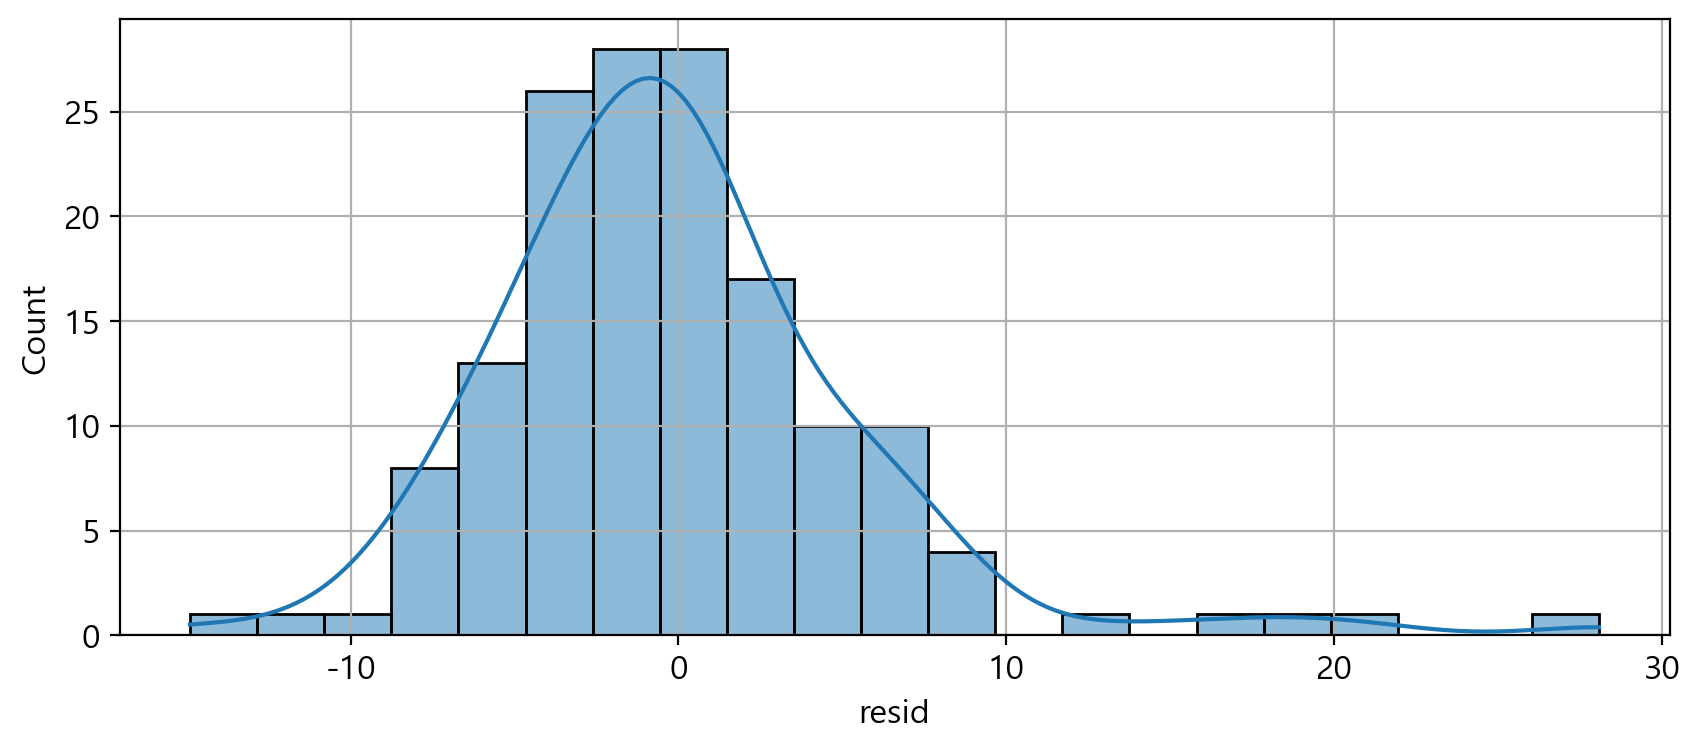

In [7]:
my_histplot(resid_df, xname='resid')

- ÏûîÏ∞® Í∑∏ÎûòÌîÑ

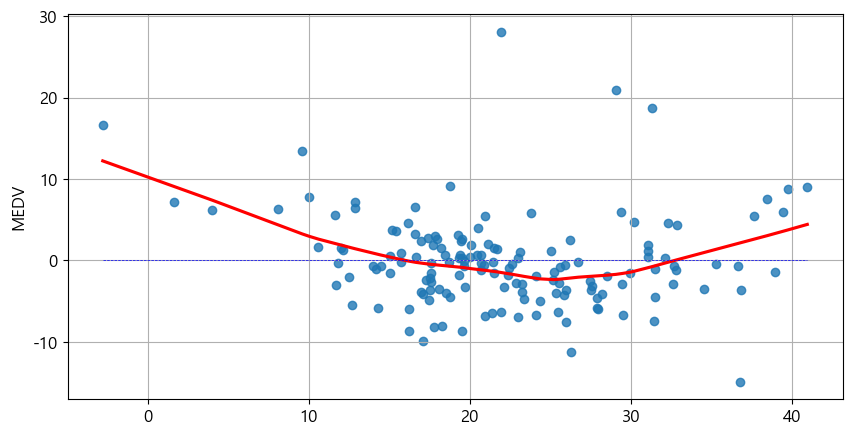

In [8]:
plt.figure(figsize=(10, 5))

sns.regplot(x=y_pred, y=resid, lowess=True, line_kws={'color': 'red'})
sns.lineplot(x=[y_pred.min(), y_pred.max()], y=[0, 0], color='blue', linestyle='--', linewidth=0.5)
plt.grid()
plt.show()
plt.close()

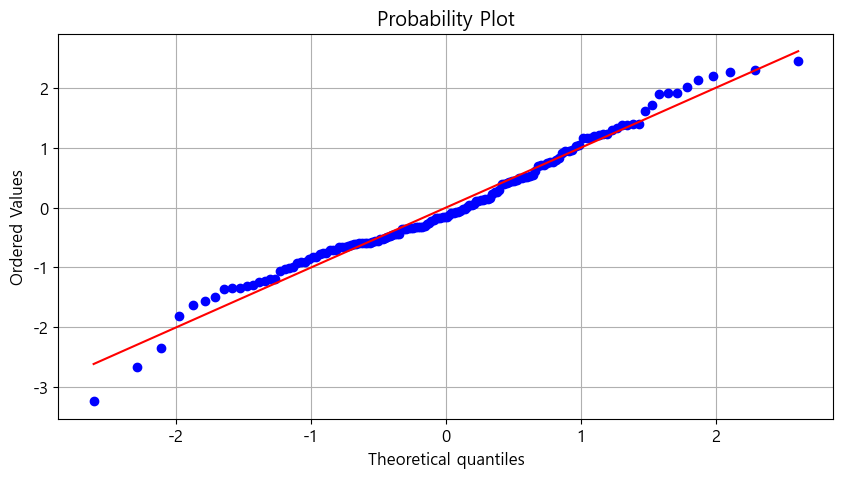

In [9]:
zs = zscore(y_pred)

plt.figure(figsize=(10, 5))
probplot(zs, plot=plt)
plt.grid()
plt.show()
plt.close()

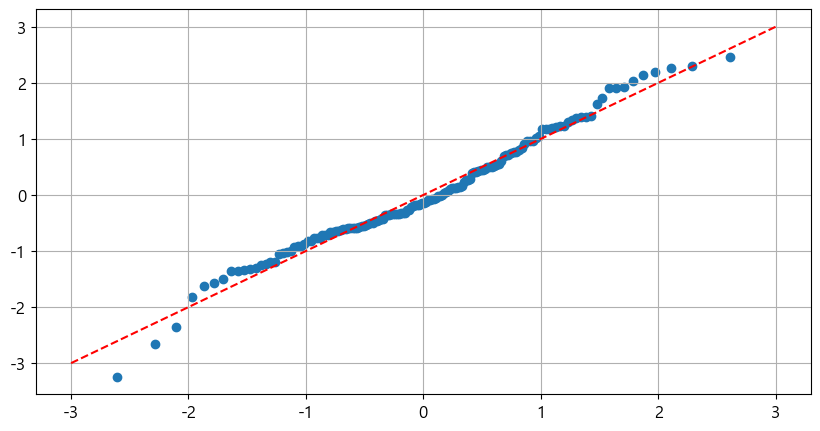

In [10]:
zs = zscore(y_pred)

plt.figure(figsize=(10, 5))
(x, y), _ = probplot(zs)

plt.scatter(x, y)
sns.lineplot(x=[-3, 3], y=[-3, 3], color='red', linestyle='--')

plt.grid()
plt.show()
plt.close()

In [11]:
mse = mean_squared_error(y_test, y_pred)
mse_sq = np.sqrt(mse)

r1 = resid[ (resid > -mse_sq) & (resid < mse_sq)].count() / resid.count() * 100
r2 = resid[ (resid > -2*mse_sq) & (resid < 2*mse_sq)].count() / resid.count() * 100
r3 = resid[ (resid > -3*mse_sq) & (resid < 3*mse_sq)].count() / resid.count() * 100

mse_r = [r1, r2, r3]

print(f"Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: {r1:1.2f}%")
print(f"Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: {r2:1.2f}%")
print(f"Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: {r3:1.2f}%")

Î£®Ìä∏ 1MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 74.34%
Î£®Ìä∏ 2MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 96.05%
Î£®Ìä∏ 3MSE Íµ¨Í∞ÑÏóê Ìè¨Ìï®Îêú ÏûîÏ∞® ÎπÑÏú®: 98.03%


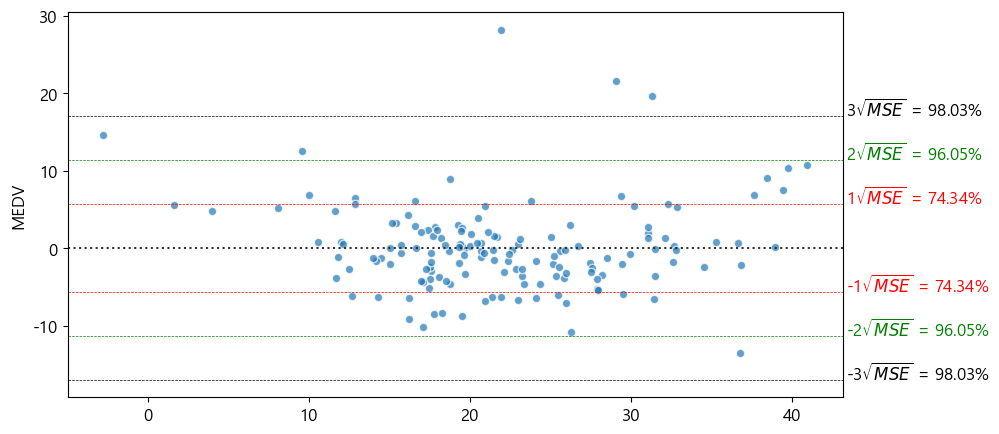

In [12]:
plt.figure(figsize=(10, 5))

# ÏùºÎ∞òÏ†ÅÏù∏ ÏûîÏ∞®ÎèÑ
# sb.residplot(x=y_pred, y=resid, lowess=True, line_kws={'color': 'red'})

sns.residplot(x=y_pred, y=resid, 
             scatter_kws = {'edgecolor':"white", "alpha":0.7})

for i, c in enumerate(['red', 'green', 'black']):
    plt.axhline(mse_sq * (i+1), color=c, linestyle='--', linewidth=0.5)
    plt.axhline(mse_sq * (-(i+1)), color=c, linestyle='--', linewidth=0.5)

# ÌòÑÏû¨ ÌëúÏãúÎêòÎäî Í∑∏ÎûòÌîÑÏùò xÏ∂ï Î≤îÏúÑÎ•º Í∞ÄÏ†∏Ïò®Îã§.
xmin, xmax = plt.xlim()

for i, c in enumerate(['red', 'green', 'black']):
    plt.text(s=f"{i+1}"r'${}\sqrt{MSE}$ = %.2f%%' % mse_r[i], x=xmax+0.2, y=(i+1)*mse_sq, color=c)
    plt.text(s=f"-{i+1}"r'${}\sqrt{MSE}$ = %.2f%%' % mse_r[i], x=xmax+0.2, y=-(i+1)*mse_sq, color=c)

plt.show()
plt.close()

In [13]:
dw = durbin_watson(resid)
print(f"Durbin-Watson: {dw}, ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: {dw > 1.5 and dw < 2.5}")

Durbin-Watson: 1.9279407375238424, ÎèÖÎ¶ΩÏÑ± Í∞ÄÏ†ï ÎßåÏ°± Ïó¨Î∂Ä: True
